<a href="https://colab.research.google.com/github/NavyaS26/Internship/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8465 - loss: 0.5114 - val_accuracy: 0.9567 - val_loss: 0.1465 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9579 - loss: 0.1470 - val_accuracy: 0.9679 - val_loss: 0.1022 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9674 - loss: 0.1072 - val_accuracy: 0.9735 - val_loss: 0.0898 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9751 - loss: 0.0766 - val_accuracy: 0.9736 - val_loss: 0.0854 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9777 - loss: 0.0697 - val_accuracy: 0.9729 - val_loss: 0.0851 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9808 - loss: 0.0604 - val_accuracy: 0.9764 - val_loss: 0.0788 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9837 - loss

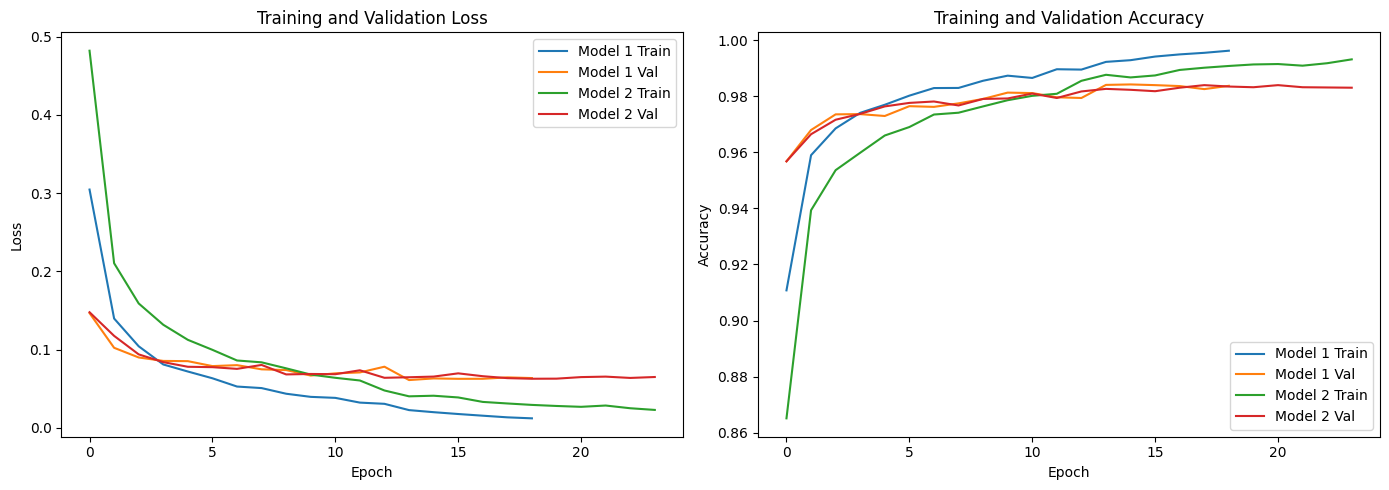

Model 1 - Test Accuracy: 0.9838, Test Loss: 0.0549
Model 2 - Test Accuracy: 0.9849, Test Loss: 0.0529


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Compile and train function
def compile_and_train(model):
    optimizer = keras.optimizers.Adam()

    lr_scheduler = keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6
    )

    early_stop = keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=5, restore_best_weights=True
    )
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(
        train_images,
        train_labels,
        validation_split=0.2,
        epochs=50,
        batch_size=128,
        callbacks=[early_stop, lr_scheduler],
        verbose=1,
    )
    return history
model_1 = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(512),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(128),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation="softmax"),
])

# Model 2: With Dropout + BatchNorm in deeper architecture
model_2 = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(256),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(128),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation="softmax"),
])

# Train both models
history_3 = compile_and_train(model_1)
history_4 = compile_and_train(model_2)

# Plot training history
def plot_history(histories, names):
    plt.figure(figsize=(14, 5))

    # Loss
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, names):
        plt.plot(history.history["loss"], label=f"{name} Train")
        plt.plot(history.history["val_loss"], label=f"{name} Val")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, names):
        plt.plot(history.history["accuracy"], label=f"{name} Train")
        plt.plot(history.history["val_accuracy"], label=f"{name} Val")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history([history_3, history_4], ["Model 1", "Model 2"])

# Final evaluation
test_loss_3, test_acc_3 = model_1.evaluate(test_images, test_labels, verbose=0)
test_loss_4, test_acc_4 = model_2.evaluate(test_images, test_labels, verbose=0)
print(f"Model 1 - Test Accuracy: {test_acc_3:.4f}, Test Loss: {test_loss_3:.4f}")
print(f"Model 2 - Test Accuracy: {test_acc_4:.4f}, Test Loss: {test_loss_4:.4f}")

Model 1 – Simpler Network with Dropout Regularization Model 1 was built using two hidden layers:

The first layer had 512 neurons,

The second layer had 128 neurons.

We used ReLU activation in the hidden layers and Softmax activation in the output layer (for classification into 10 digits).

To prevent overfitting, we added Dropout, which randomly turns off some neurons during training. Specifically:

30% dropout was applied after the first hidden layer.

20% dropout was applied after the second hidden layer.

We also used Batch Normalization, which helps stabilize and speed up training.

During training:

The model quickly reached a high accuracy on both training and validation sets.

It achieved around 97.9% accuracy on test data, which is very good.

However, the test loss was slightly higher, around 0.0623. This means the model was slightly less confident in its predictions.